# Data Analysis on Tatenic  dataset using Logistic Regreesion

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
titanic_Df=sns.load_dataset('titanic')

In [7]:
titanic_Df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [8]:
titanic_Df.shape

(891, 15)

In [9]:
print('Total Lenght of passenger ',str(len(titanic_Df['pclass'])))

Total Lenght of passenger  891


# Analyzing data 

<AxesSubplot:xlabel='alive', ylabel='count'>

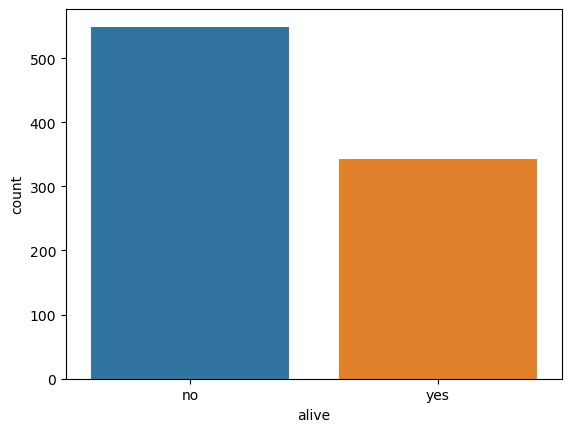

In [10]:
sns.countplot(data=titanic_Df,x = 'alive')

<AxesSubplot:xlabel='alive', ylabel='count'>

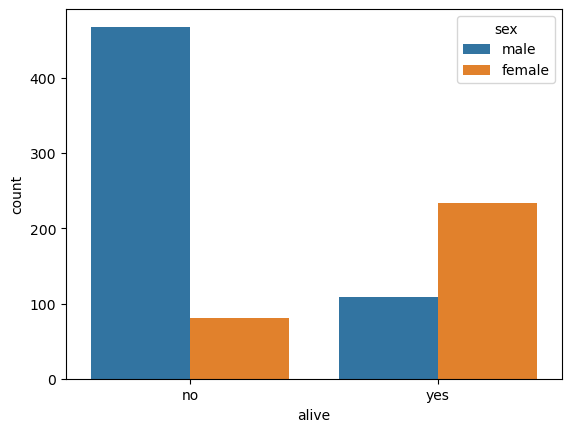

In [11]:
sns.countplot(data=titanic_Df,x='alive',hue='sex')

<AxesSubplot:xlabel='alive', ylabel='count'>

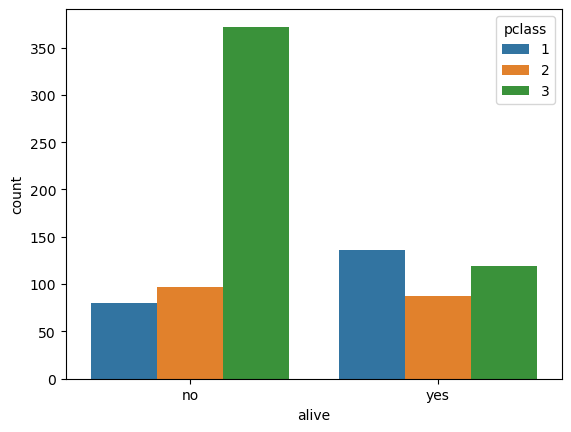

In [17]:
sns.countplot(data=titanic_Df,x='alive',hue='pclass')

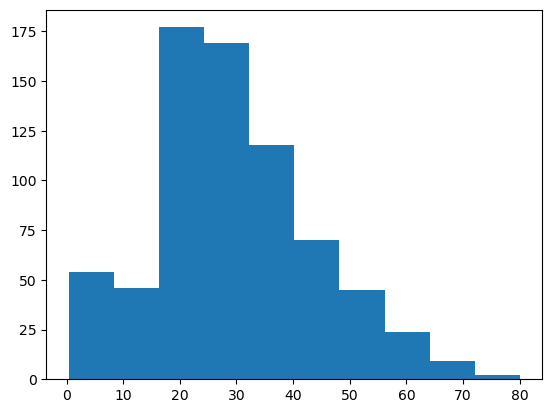

In [22]:
plt.hist(titanic_Df['age'])
plt.show()

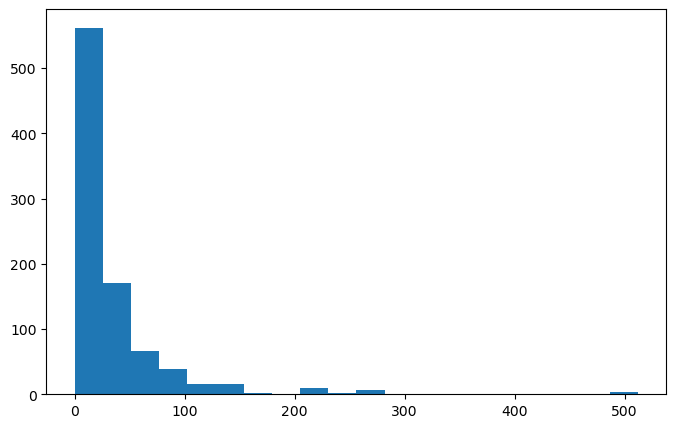

In [29]:
plt.figure(figsize=(8,5))
plt.hist(titanic_Df['fare'],bins=20)
plt.show()

In [30]:
titanic_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Data warnging (data cleaning)

In [32]:
titanic_Df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
titanic_Df.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

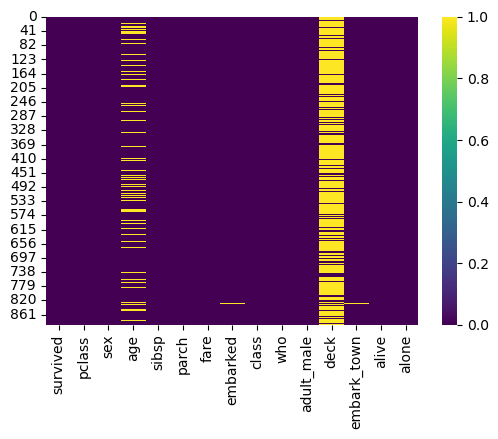

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(titanic_Df.isnull(),cmap='viridis')
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='age'>

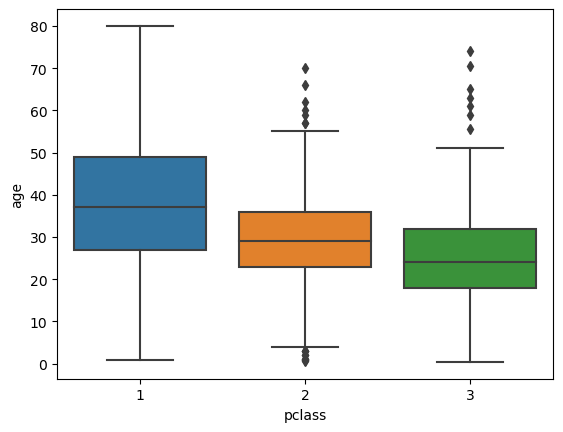

In [54]:
sns.boxplot(x='pclass', y='age',data=titanic_Df)

In [55]:
titanic_Df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [62]:
titanic_Df.drop('deck',axis=1,inplace=True)

In [63]:
titanic_Df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [64]:
titanic_Df.dropna(inplace=True)

In [65]:
titanic_Df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<AxesSubplot:>

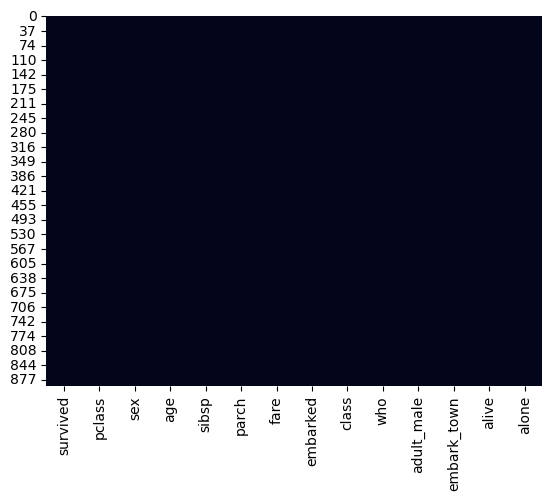

In [67]:
sns.heatmap(titanic_Df.isnull(),cbar=False)

In [68]:
titanic_Df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [69]:
sex=pd.get_dummies(titanic_Df['sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [73]:
embark=pd.get_dummies(titanic_Df['embark_town'],drop_first=True)
embark.head(5)

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [74]:
pcl=pd.get_dummies(titanic_Df['pclass'],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [87]:
titanic_Df=pd.concat([titanic_Df,sex,embark,pcl],axis=1)
titanic_Df

,survived,age,sibsp,parch,fare,alone,male,Queenstown,Southampton,2,...,male,Queenstown,Southampton,2,3,male,Queenstown,Southampton,2,3
0,0,22.0,1,0,7.2500,False,1,0,1,0,...,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,...,1,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,False,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
886,0,27.0,0,0,13.0000,True,1,0,1,1,...,1,0,1,1,0,1,0,1,1,0
887,1,19.0,0,0,30.0000,True,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
889,1,26.0,0,0,30.0000,True,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [90]:
# titanic_Df.drop(['sex','pclass','embarked'],axis=True,inplace=True)

In [91]:
titanic_Df.head(5)

,survived,age,sibsp,parch,fare,alone,male,Queenstown,Southampton,2,...,male,Queenstown,Southampton,2,3,male,Queenstown,Southampton,2,3
0,0,22.0,1,0,7.2500,False,1,0,1,0,...,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,...,1,0,1,0,1,1,0,1,0,1


In [93]:
# titanic_Df.drop(['class','who','adult_male','embark_town','alive'],axis=True,inplace=True)

In [94]:
titanic_Df

,survived,age,sibsp,parch,fare,alone,male,Queenstown,Southampton,2,...,male,Queenstown,Southampton,2,3,male,Queenstown,Southampton,2,3
0,0,22.0,1,0,7.2500,False,1,0,1,0,...,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,...,1,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,False,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
886,0,27.0,0,0,13.0000,True,1,0,1,1,...,1,0,1,1,0,1,0,1,1,0
887,1,19.0,0,0,30.0000,True,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
889,1,26.0,0,0,30.0000,True,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [96]:
titanic_Df.drop(['alone','Southampton','Queenstown'],axis=True,inplace=True)

In [111]:
titanic_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   age       712 non-null    float64
 2   sibsp     712 non-null    int64  
 3   parch     712 non-null    int64  
 4   fare      712 non-null    float64
 5   male      712 non-null    uint8  
 6   2         712 non-null    uint8  
 7   3         712 non-null    uint8  
 8   male      712 non-null    uint8  
 9   2         712 non-null    uint8  
 10  3         712 non-null    uint8  
 11  male      712 non-null    uint8  
 12  2         712 non-null    uint8  
 13  3         712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(9)
memory usage: 55.8 KB


# Train dataset 

In [114]:
x=titanic_Df.drop('survived',axis=1)
y=titanic_Df['survived']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logmodel=LogisticRegression()

In [119]:
logmodel.fit(X_train,y_train)

C:\Users\rishu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [126]:
prediction=logmodel.predict(X_test)

C:\Users\rishu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [123]:
y_pred = logmodel.predict(X_test)

C:\Users\rishu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [124]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test,prediction)

array([[113,  26],
       [ 25,  71]], dtype=int64)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy_score(y_test,prediction)

0.7829787234042553

In [131]:
accuracy_score(y_test,prediction)*100

78.29787234042553

In [134]:
df=pd.read_csv('C:\\Users\\rishu\\Desktop\\DATA SET\\suv_data.csv')

In [135]:
df.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


In [136]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [137]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

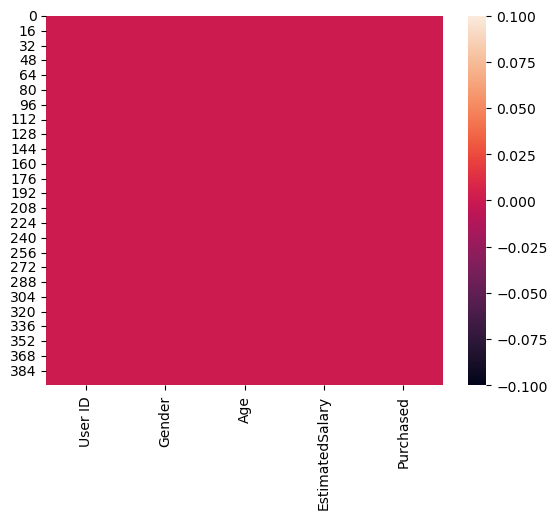

In [139]:
sns.heatmap(df.isnull())

In [142]:
##prediction using logistic regreesion 

x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [143]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [144]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [146]:
from sklearn.model_selection import train_test_split

In [164]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.33, random_state=0)

In [165]:
from sklearn.preprocessing import StandardScaler

In [182]:
sc=StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [183]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train1,y_train1)

LogisticRegression(random_state=0)

In [184]:
y_pred1=classifier.predict(X_test1)

In [185]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(y_test1,y_pred1)*100

87.12121212121212